<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/RNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        72,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,530 (295.04 KB)

 Trainable params: 75,530 (295.04 KB)

 Non-trainable params: 0 (0.00 B)

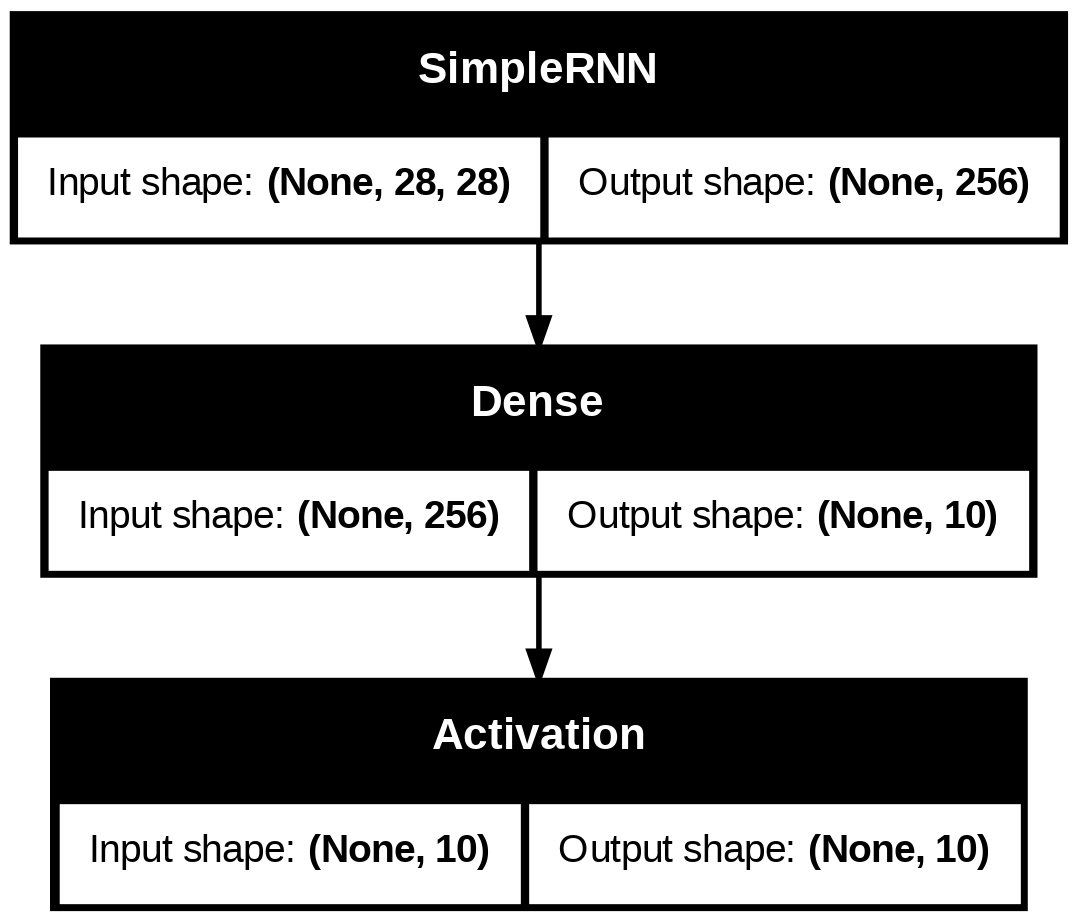

In [2]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,dropout=dropout,input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification task

In [3]:
model.compile(loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
_, acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.6410 - loss: 1.1698
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8816 - loss: 0.4089
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9127 - loss: 0.2908
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9295 - loss: 0.2374
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9383 - loss: 0.2039
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9462 - loss: 0.1788
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9511 - loss: 0.1618
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9547 - loss: 0.1508
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9564 - loss: 0.1459
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9588 - loss: 0.1354

Test accuracy: 97.0%
